In [1]:
import os
import pygmt
import numpy as np
import xarray as xr
import rioxarray
import pandas as pd
import cmocean
import seaborn as sns


import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy import spatial
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from skimage.measure import find_contours

import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.path import Path



/Users/beatrizhadler/anaconda3/envs/gospl-global/lib/python3.10/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


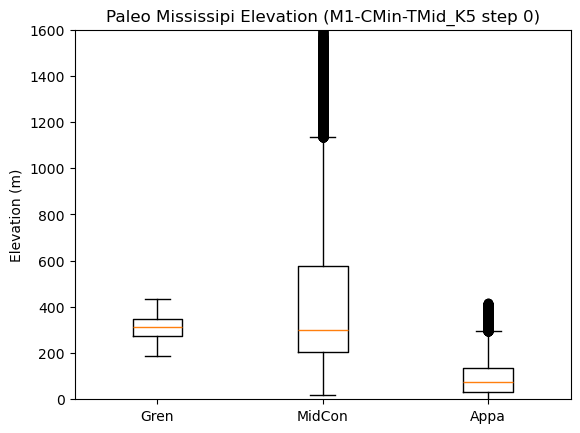

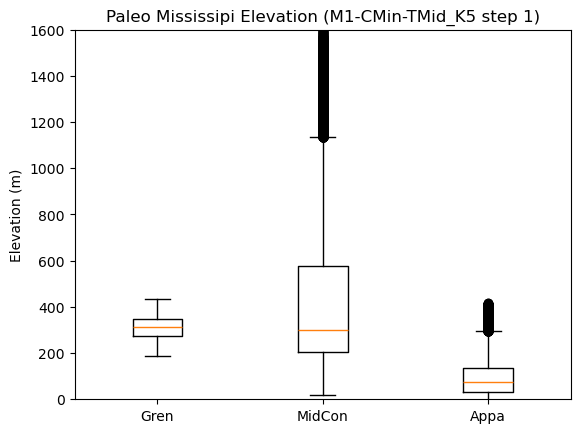

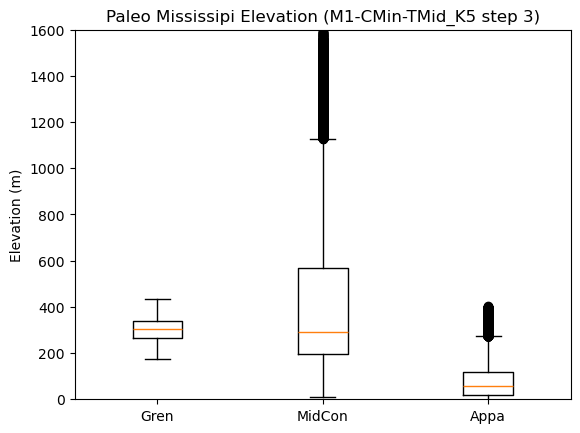

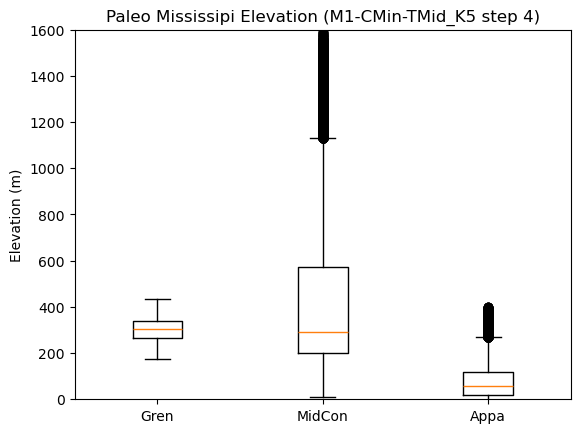

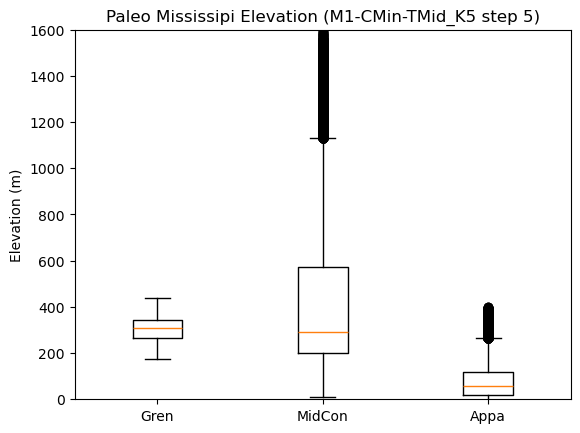

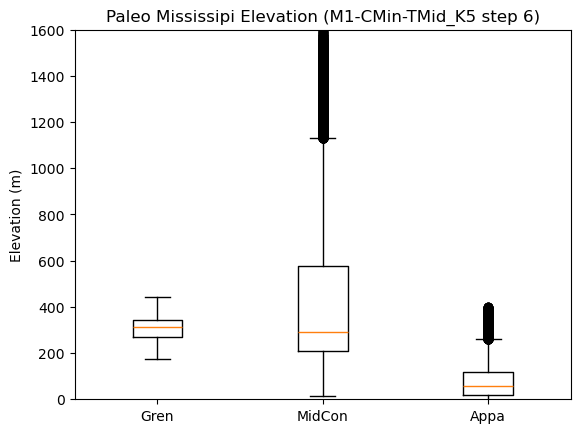

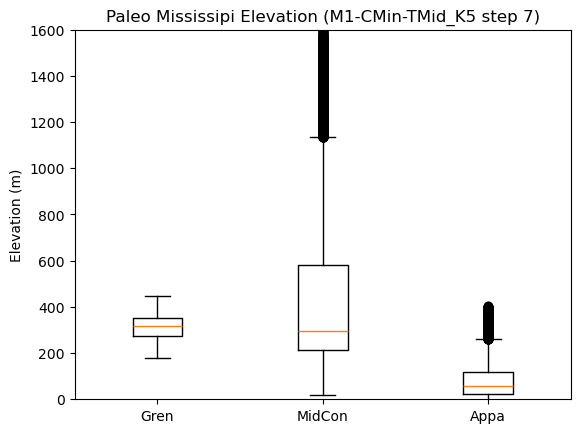

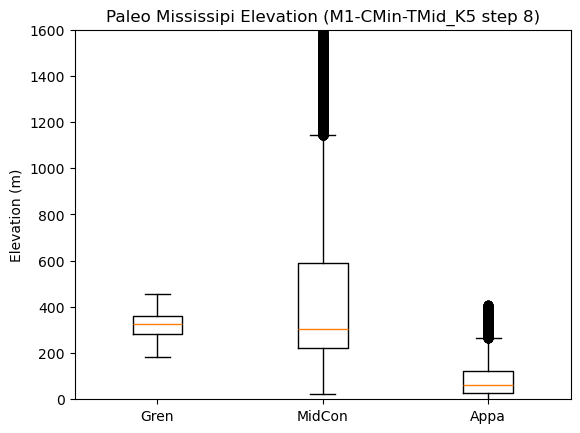

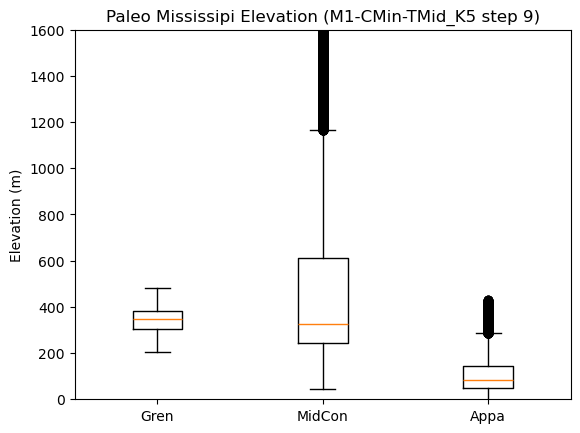

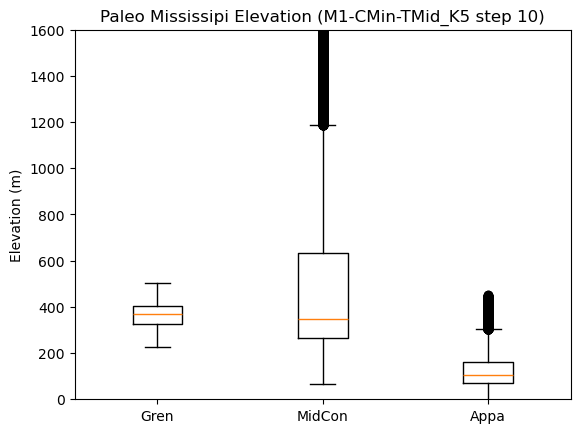

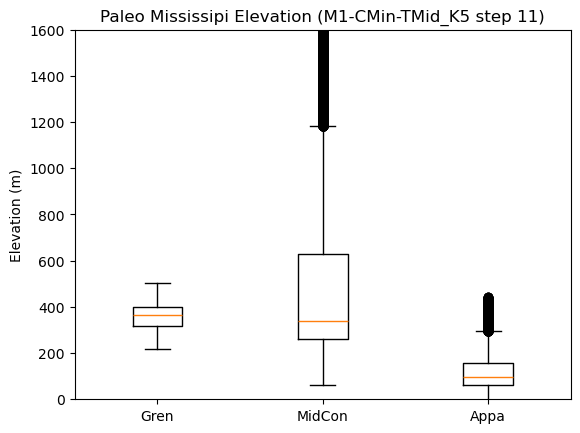

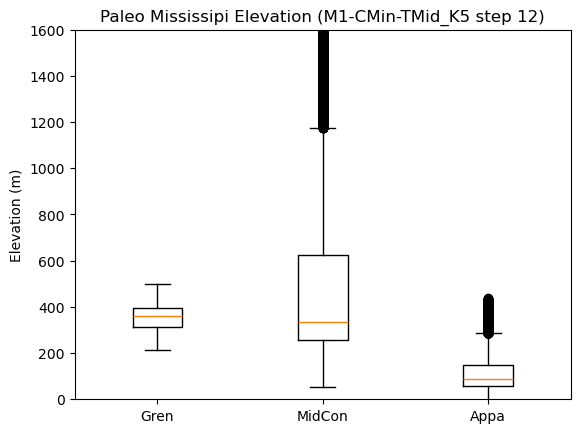

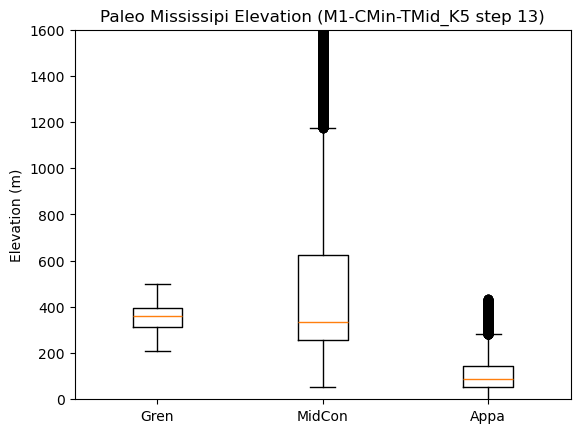

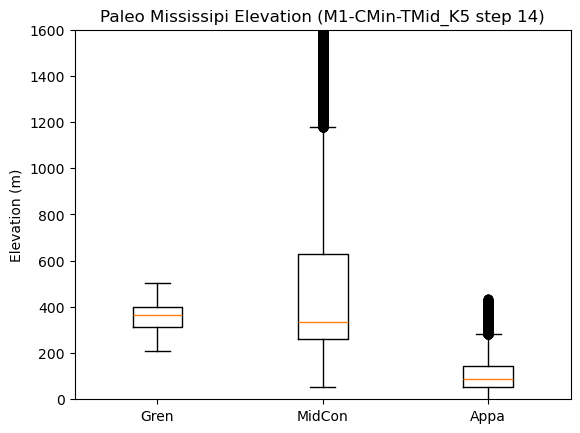

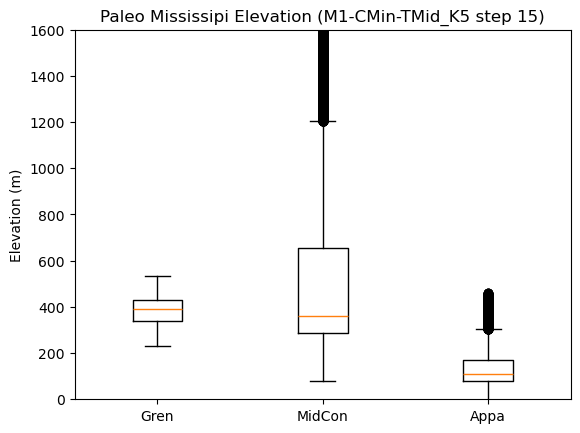

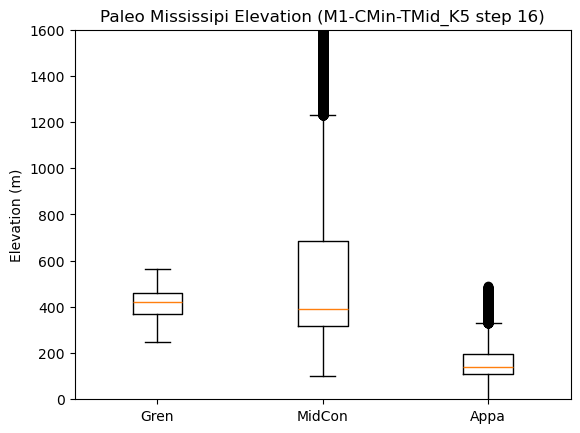

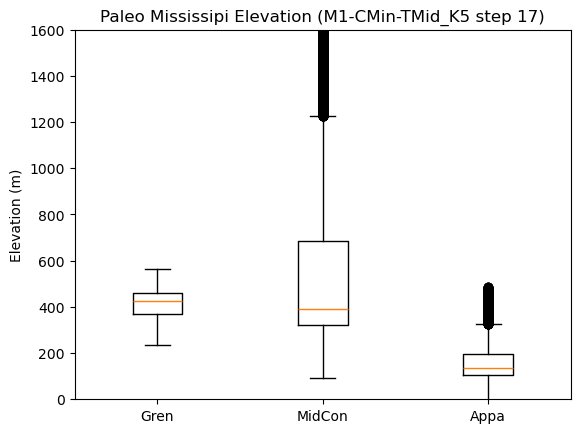

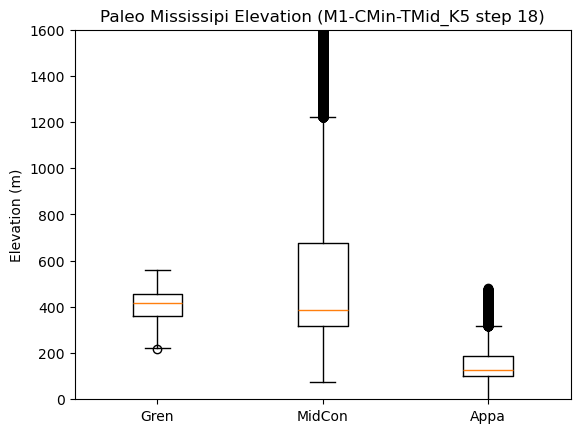

In [12]:
# Define the output directory where merged files will be saved
model = 'M1-CMin-TMid_K5'
out = '../3_rasters/4_fullTime/' + model


# Define a range of steps (0 to 5) for processing data
step_range = range(0, 19)

# Define the path to the NetCDF files containing additional variables
nc2 = "./GOM_XUlatlon.nc"

# Specify the variables to be added from the external dataset
variables_to_add = ["ProvenanceC", "accMio","Provenance"]

# Iterate over each step in the defined range
for step in step_range:
   
    # Select one of the merged raster files to inspect
    merged_nc = os.path.join(out, f"Merged_{step}.nc")
     # Open the merged NetCDF file
    merged_dataset = xr.open_dataset(merged_nc, engine='netcdf4')
   
    PMiss = merged_dataset.where(merged_dataset.ProvenanceC == 2)
    Appa = PMiss.where(PMiss.Provenance == 1)
    Gren = PMiss.where(PMiss.Provenance == 2)
    MidCon = PMiss.where(PMiss.Provenance == 6)
    
    AppaElev = Appa['elevation']
    AppaElevF = AppaElev.values.flatten()
    AppaElevFC = AppaElevF[~np.isnan(AppaElevF)]
    
    
    GrenElev = Gren['elevation']
    GrenElevF = GrenElev.values.flatten()
    GrenElevFC = GrenElevF[~np.isnan(GrenElevF)]
    
    
    
    MidConElev = MidCon['elevation']
    MidConElevF = MidConElev.values.flatten()
    MidConElevFC = MidConElevF[~np.isnan(MidConElevF)]
    
    # Create a boxplot
    plt.boxplot([GrenElevFC, MidConElevFC, AppaElevFC], tick_labels=['Gren', 'MidCon', 'Appa'])
    plt.title('Paleo Mississipi Elevation ('+str(model)+ ' step ' +str(step)+')')
    # plt.xlabel('MidCon.elevation')
    plt.ylabel('Elevation (m)')
    plt.ylim(0, 1600)

# plt.savefig(out + 'Elevations.png')
    plt.show()


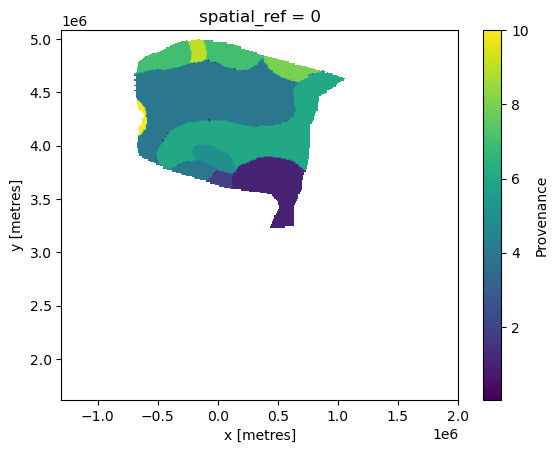

In [8]:
PMiss = merged_dataset.where(merged_dataset.ProvenanceC == 2)
Appa = PMiss.where(PMiss.Provenance == 1)

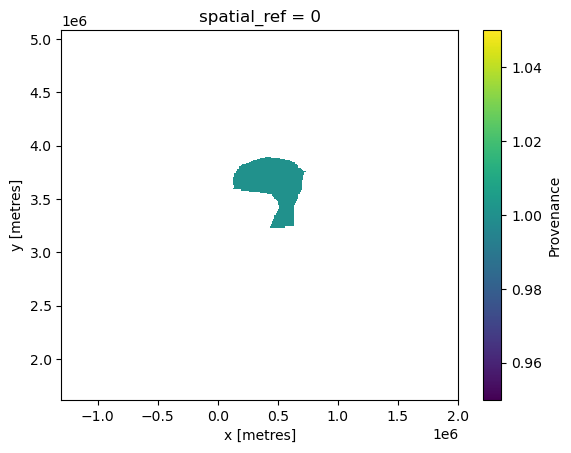

In [14]:
Appa.Provenance.plot()

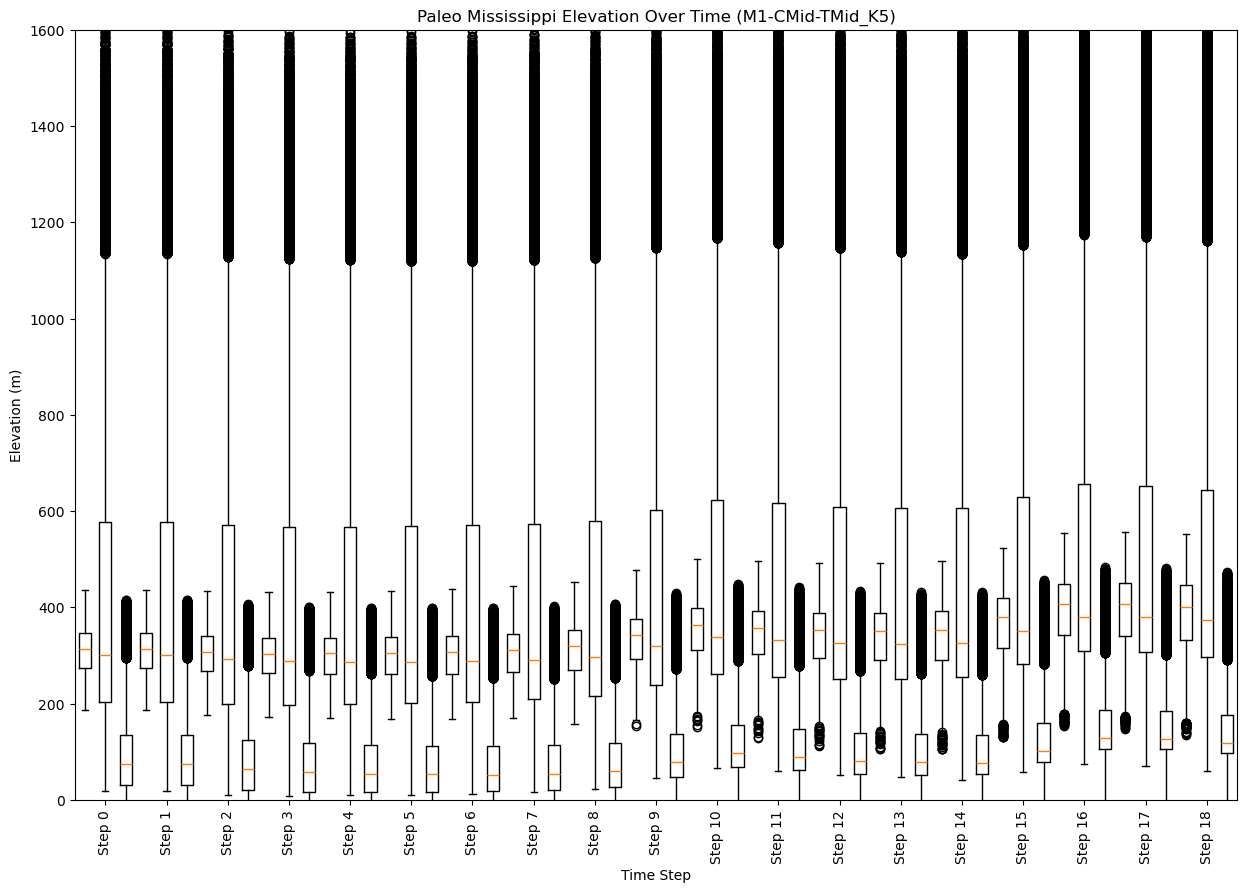

In [13]:
# Define the output directory where merged files will be saved
model = 'M1-CMid-TMid_K5'
out = '../3_rasters/4_fullTime/' + model

# Define a range of steps (0 to 19) for processing data
step_range = range(0, 19)

# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Iterate over each step in the defined range
for step in step_range:
    # Select one of the merged raster files to inspect
    merged_nc = os.path.join(out, f"Merged_{step}.nc")
    
    # Open the merged NetCDF file
    merged_dataset = xr.open_dataset(merged_nc, engine='netcdf4')
    
    PMiss = merged_dataset.where(merged_dataset.ProvenanceC == 2)
    Appa = PMiss.where(PMiss.Provenance == 1)
    Gren = PMiss.where(PMiss.Provenance == 2)
    MidCon = PMiss.where(PMiss.Provenance == 6)
    
    AppaElev = Appa['elevation']
    AppaElevF = AppaElev.values.flatten()
    AppaElevFC = AppaElevF[~np.isnan(AppaElevF)]
    
    GrenElev = Gren['elevation']
    GrenElevF = GrenElev.values.flatten()
    GrenElevFC = GrenElevF[~np.isnan(GrenElevF)]
    
    MidConElev = MidCon['elevation']
    MidConElevF = MidConElev.values.flatten()
    MidConElevFC = MidConElevF[~np.isnan(MidConElevF)]
    
    # Create a boxplot for each time step and plot them together
    plt.boxplot([GrenElevFC, MidConElevFC, AppaElevFC], positions=[step*3, step*3+1, step*3+2], widths=0.6)

# Customize the plot
plt.title('Paleo Mississippi Elevation Over Time (' + model + ')')
plt.xlabel('Time Step')
plt.ylabel('Elevation (m)')
plt.ylim(0, 1600)
plt.xticks(ticks=np.arange(0, len(step_range)*3, 3) + 1, labels=[f'Step {i}' for i in step_range], rotation=90)

# Save the plot
# plt.savefig(out + 'All_Elevations_Over_Time.png')
plt.show()


In [ ]:
# Define the output directory where merged files will be saved
# model = 'M1-CMax-THigh_K5'
# model = 'M1-CMax-TMid_K5'
# model = 'M1-CMax-TLow_K5'

# model = 'M1-CMid-THigh_K5'
# model = 'M1-CMid-TMid_K5'
# model = 'M1-CMid-TLow_K5'

# model = 'M1-CMin-THigh_K5'
# model = 'M1-CMin-TMid_K5'
model = 'M1-CMin-TLow_K5'


out = '../3_rasters/4_fullTime/' + model

# Define a range of steps (0 to 19) for processing data
step_range = range(0, 19)

# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Colors for different regions
colors = {'Gren': 'yellow', 'MidCon': 'red', 'Appa': 'blue'}

# Iterate over each step in the defined range
for step in step_range:
    # Select one of the merged raster files to inspect
    merged_nc = os.path.join(out, f"Merged_{step}.nc")
    
    # Open the merged NetCDF file
    merged_dataset = xr.open_dataset(merged_nc, engine='netcdf4')
    
    PTenn = merged_dataset.where(merged_dataset.ProvenanceC == 1)
    Appa = PTenn.where(PTenn.Provenance == 1)
    Gren = PTenn.where(PTenn.Provenance == 2)
    MidCon = PTenn.where(PTenn.Provenance == 6)
    
    AppaElev = Appa['elevation']
    AppaElevF = AppaElev.values.flatten()
    AppaElevFC = AppaElevF[~np.isnan(AppaElevF)]
     # Remove values below zero from AppaElevFC
    AppaElevFC = AppaElevFC[AppaElevFC >= 0]
    
    GrenElev = Gren['elevation']
    GrenElevF = GrenElev.values.flatten()
    GrenElevFC = GrenElevF[~np.isnan(GrenElevF)]
    
    MidConElev = MidCon['elevation']
    MidConElevF = MidConElev.values.flatten()
    MidConElevFC = MidConElevF[~np.isnan(MidConElevF)]

    # Create a boxplot for each region and plot them together with different colors

    plt.boxplot(GrenElevFC, positions=[step*3], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=colors['Gren'], color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='black'),
                flierprops=dict(markerfacecolor=colors['Gren'], markeredgecolor='black'))
    plt.boxplot(MidConElevFC, positions=[step*3+1], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=colors['MidCon'], color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='black'),
                flierprops=dict(markerfacecolor=colors['MidCon'], markeredgecolor='black'))
    plt.boxplot(AppaElevFC, positions=[step*3+2], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=colors['Appa'], color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='black'),
                flierprops=dict(markerfacecolor=colors['Appa'], markeredgecolor='black'))


# Customize the plot
plt.title('Paleo Tennessee Precipitation Over Time (' + model + ')')
plt.xlabel('Time Step')
plt.ylabel('Elevation (m)')
plt.ylim(00, 1600)

plt.xticks(ticks=np.arange(0, len(step_range)*3, 3) + 1, labels=[f'Step {i}' for i in step_range], rotation=90)

# # Add legend
# handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
# labels = colors.keys()
# plt.legend(handles, labels)

# # Save the plot
# plt.savefig(out + 'All_Elevations_Over_Time.png', dpi = 500)
# plt.savefig(out + 'All_Elevations_Over_Time.svg')
plt.show()


In [74]:
# Define the minimum and maximum values for the x and y coordinates of the box
min_x = -1300000
min_y = 1640000
max_x = 2000000
max_y = 5080000

# Select a subset of the merged dataset within the specified box
ds = merged_dataset.sel(x=slice(min_x, max_x), y=slice(min_y, max_y))

# Access the x and y coordinates of the selected subset
x = ds['x']
y = ds['y']


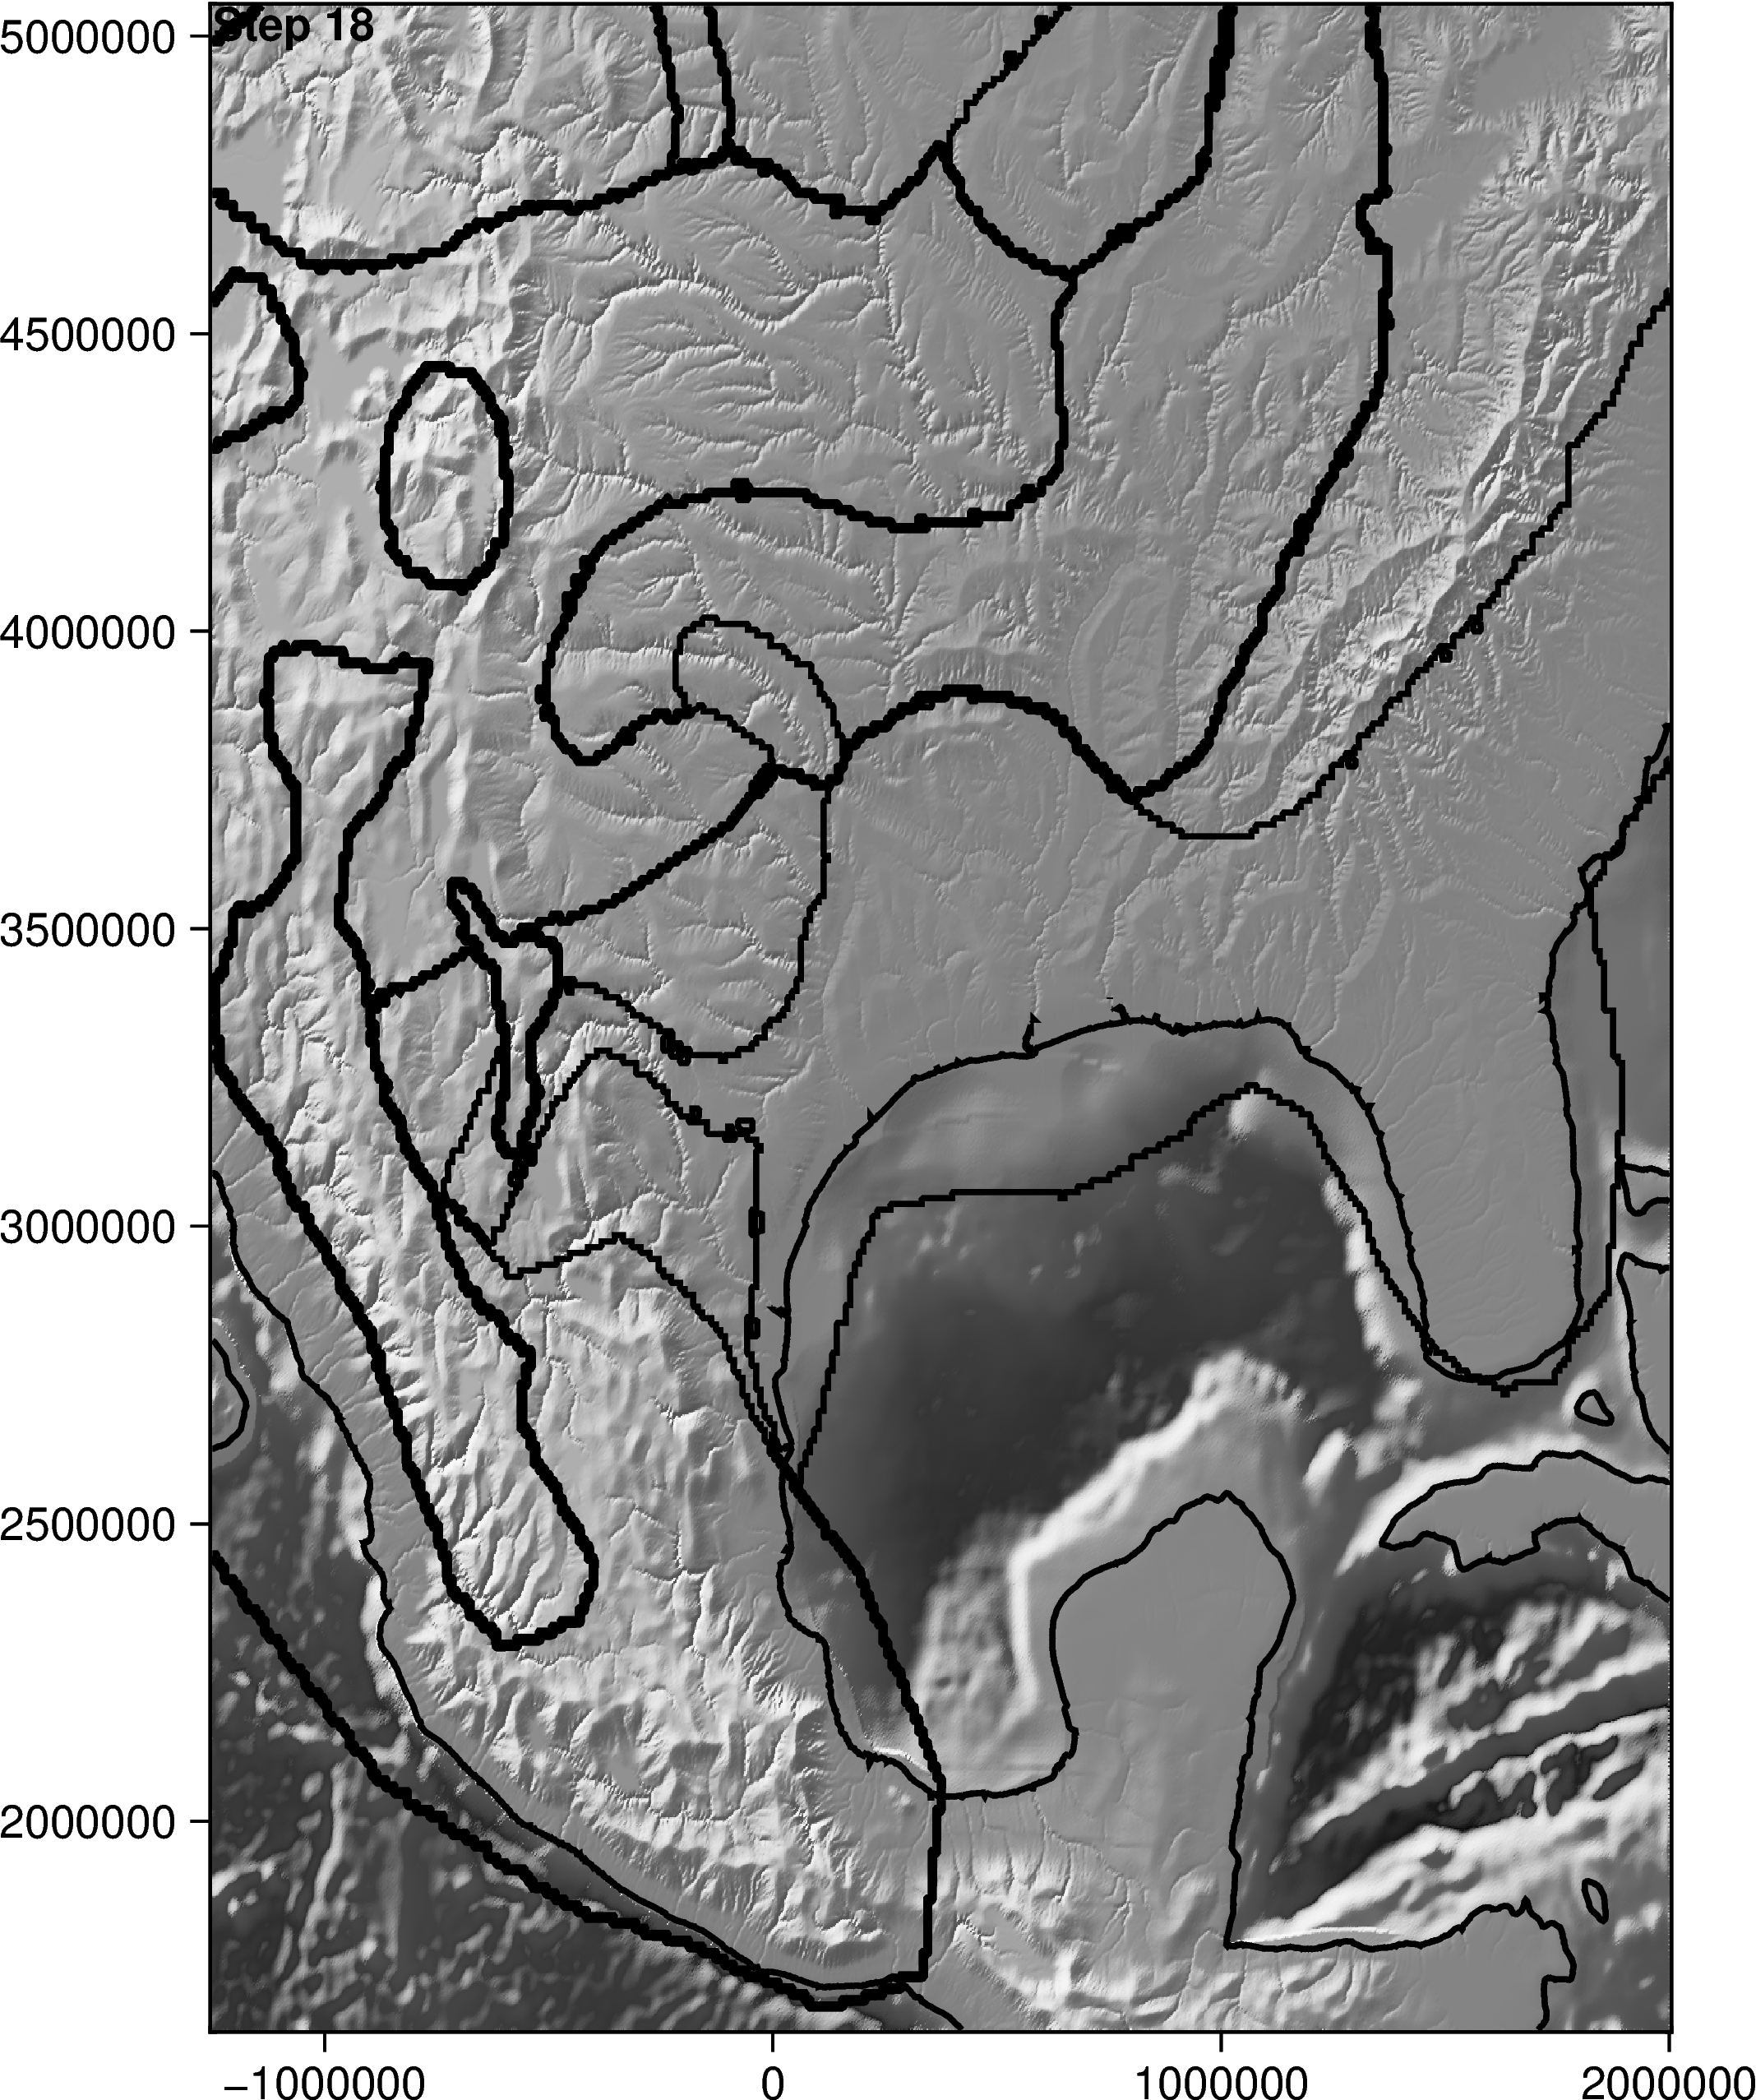

In [29]:
## Let's plot the box you will work on
region=[-1.25e6,2.0e6,1.65e6,5.05e6]
fig = pygmt.Figure()
with pygmt.config(FONT='8p,Helvetica,black'):
    pygmt.makecpt(cmap="geo", series=[-6000, 6000]) # Define a colormap ranging from -6000 to 6000
    fig.basemap( region=region,
        frame=['a'], # Set the frame style
        projection="X9c/12.5c", # Define the projection type and scale
    )
    fig.grdimage(merged_dataset.elevation, shading=True, frame=False)
    fig.grdcontour(levels=0.1, grid=merged_dataset.elevation, limit=[-0.0001, 0.0001], pen='1p')
    # fig.grdcontour(levels=1, grid=merged_dataset.ProvenanceC, limit=[0, 10], pen='1p')
    fig.grdcontour(levels=1, grid=merged_dataset.Provenance, limit=[0, 10], pen='1p')


    # fig.colorbar(frame=["a2000", "x+lElevation", "y+lm"], position="jBC+o0c/-2.5c+w10c/0.3c+h")
    fig.text(text="Step " + str(step), position="TL", font="8p,Helvetica-Bold,black")

# Display the figure
fig.show(dpi=500, width=500)
fig.savefig(f"Mississipi_Provenances.png", dpi=500)

In [67]:

model1 = 'M1-CMax-THigh_K5'
# 
model2 = 'M1-CMid-TMid_K5'

# model2 = 'M1-CMin-TLow_K5'


out1 = '../3_rasters/4_fullTime/' + model1
out2 = '../3_rasters/4_fullTime/' + model2

# # Iterate over each step in the defined range
# for step in step_range:
step = 18
# Select one of the merged raster files to inspect
merged_nc1 = os.path.join(out1, f"Merged_{step}.nc")
merged_nc2 = os.path.join(out2, f"Merged_{step}.nc")
# Open the merged NetCDF file
merged_dataset1 = xr.open_dataset(merged_nc1, engine='netcdf4')
merged_dataset2 = xr.open_dataset(merged_nc2, engine='netcdf4')

PMiss01 = merged_dataset1.where(merged_dataset1.ProvenanceC == 2)
PMiss02 = merged_dataset2.where(merged_dataset2.ProvenanceC == 2)

region = [merged_dataset1.x.min().values, merged_dataset1.x.max().values, merged_dataset1.y.min().values, merged_dataset1.y.max().values]

PMiss1 = PMiss01.where(PMiss01.elevation >= 0)
PMiss2 = PMiss02.where(PMiss02.elevation >= 0)

resulPMiss = PMiss1 - PMiss2
    

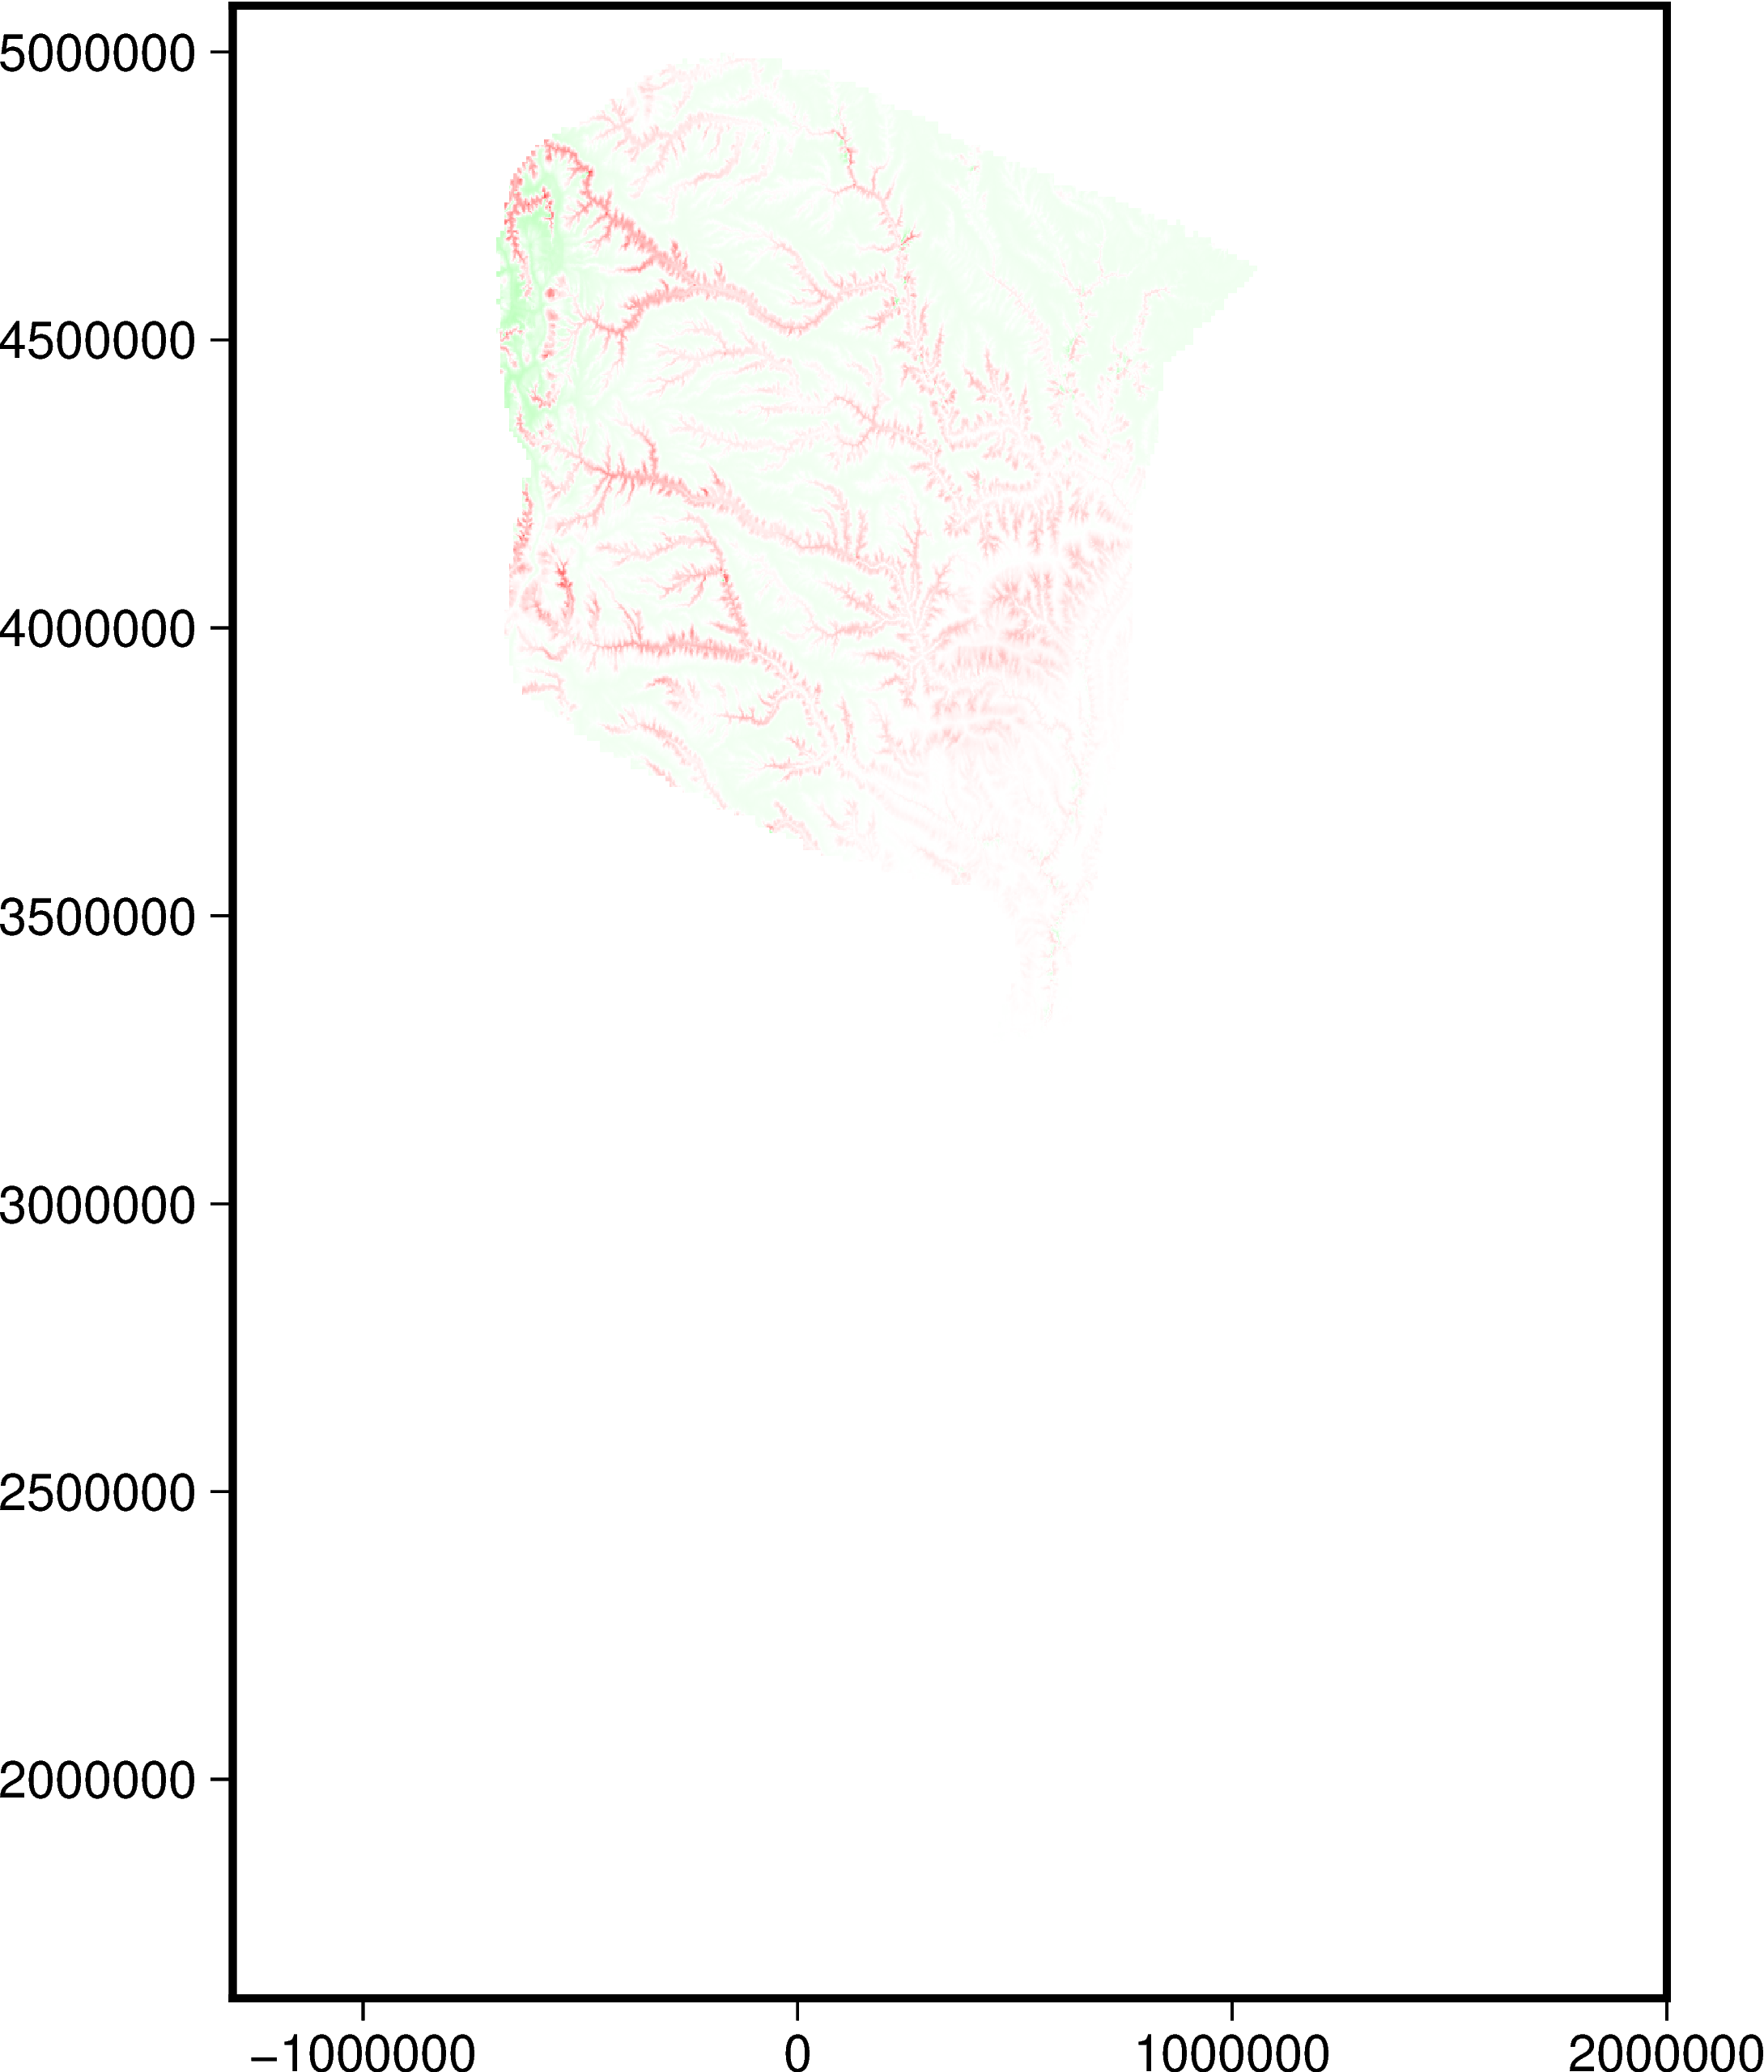

In [68]:
# Initialize a figure for plotting
fig = pygmt.Figure()

projection = "X9c/12.5c"

# Create colormaps for each dataset
pygmt.makecpt(cmap="red2green", series=[-600, 600], output="diff_elev")
pygmt.makecpt(cmap="gray", series=[-6000, 6000], output="geo")

# Plot the basemap
fig.basemap(region=region, projection=projection, frame=['a'])

# Plot the grid images with their respective colormaps
# fig.grdimage(grid=merged_dataset1.elevation, shading=True, cmap="geo", transparency = 40)
fig.grdimage(grid=resulPMiss.elevation, shading=False, cmap="diff_elev", nan_transparent=True)

# Add a colorbar
# fig.colorbar(frame=["a100", "x+lElevation Difference (m)", "y+lm"], position="jBC+o0c/-2.5c+w10c/0.3c+h")
# Save the figure
# fig.savefig(f"Mississippi_Elev_difference_{model1}_minus_{model2}.png", dpi=500)
# fig.savefig(f"Mississippi_Polygons_elev.png", dpi=500)

# Display the figure
fig.show(dpi=500, width=500)

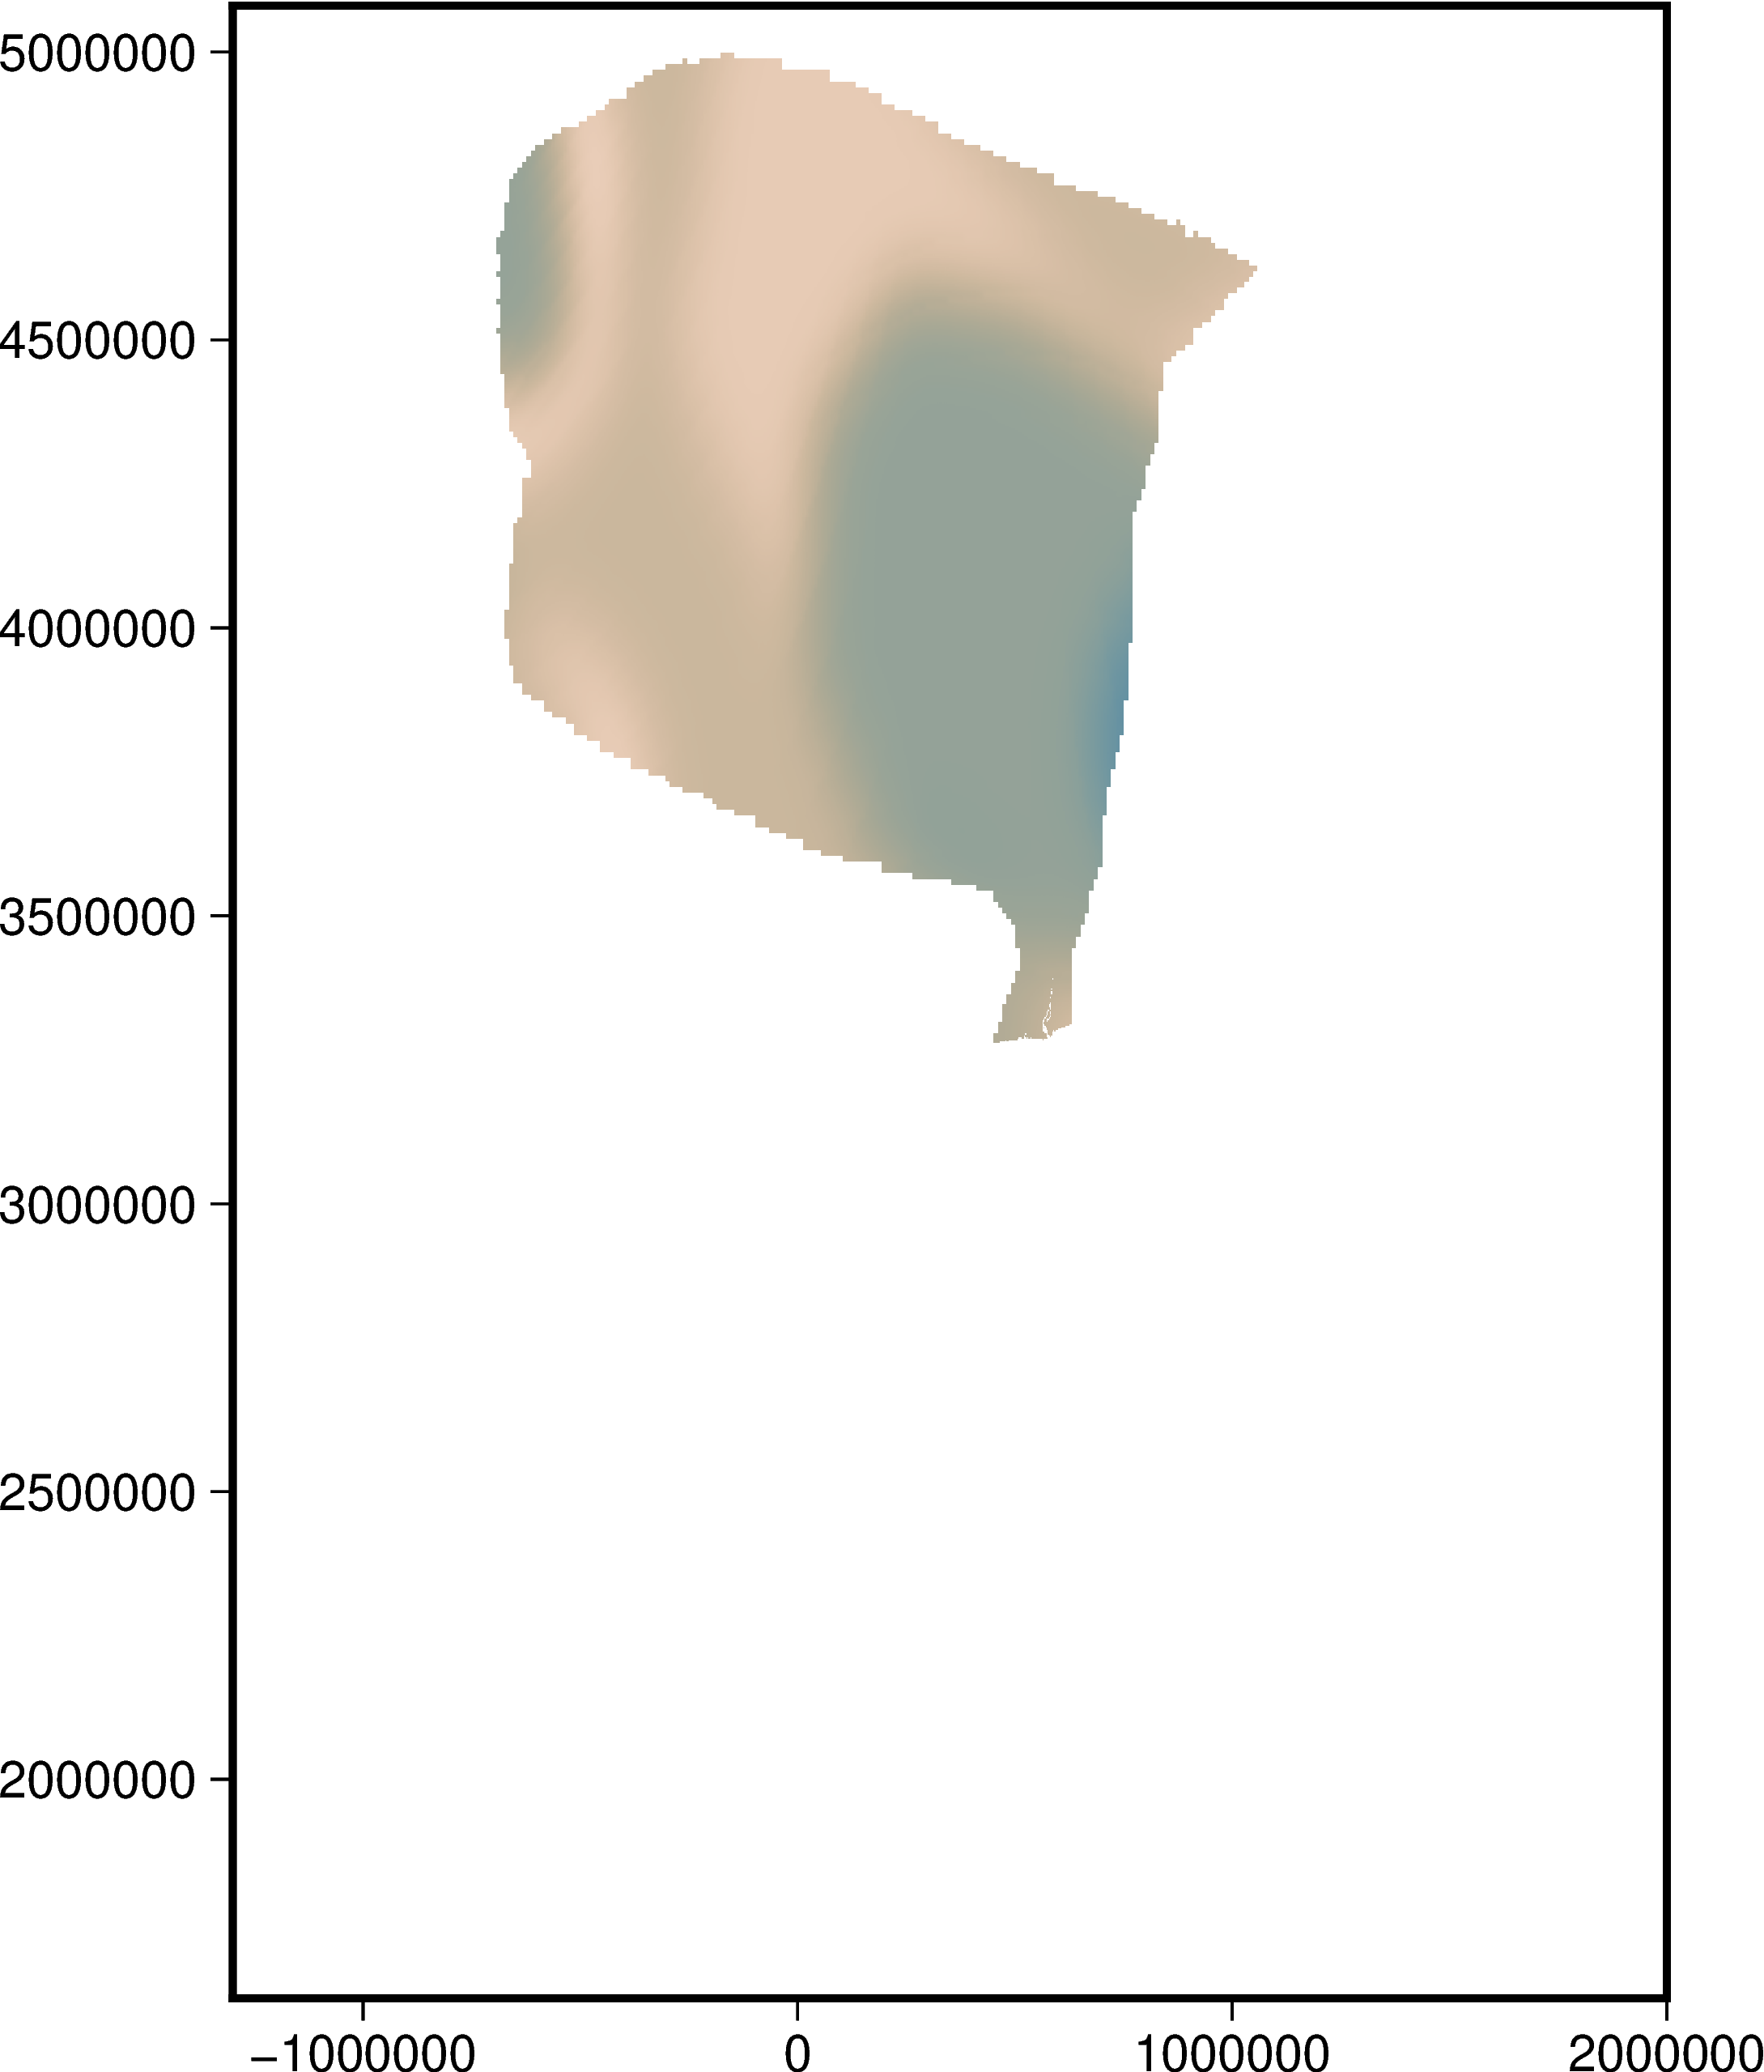

In [69]:
# Initialize a figure for plotting
fig = pygmt.Figure()

projection = "X9c/12.5c"

# Create colormaps for each dataset
pygmt.makecpt(cmap="lapaz", reverse = True, series=[0, 1.5], output="diff_precip")
pygmt.makecpt(cmap="gray", series=[-6000, 6000], output="geo")

# Plot the basemap
fig.basemap(region=region, projection=projection, frame=['a'])

# Plot the grid images with their respective colormaps
# fig.grdimage(grid=merged_dataset1.elevation, shading=True, cmap="geo", transparency = 40)
fig.grdimage(grid=resulPMiss.precipitation, shading=False, cmap="diff_precip", nan_transparent=True)

# Add a colorbar
# fig.colorbar(frame=["a100", "x+lElevation Difference (m)", "y+lm"], position="jBC+o0c/-2.5c+w10c/0.3c+h")
# Save the figure
# fig.savefig(f"Mississippi_Precip_difference_{model1}_minus_{model2}.png", dpi=500)
# fig.savefig(f"Mississippi_Polygons_elev.png", dpi=500)

# Display the figure
fig.show(dpi=500, width=500)

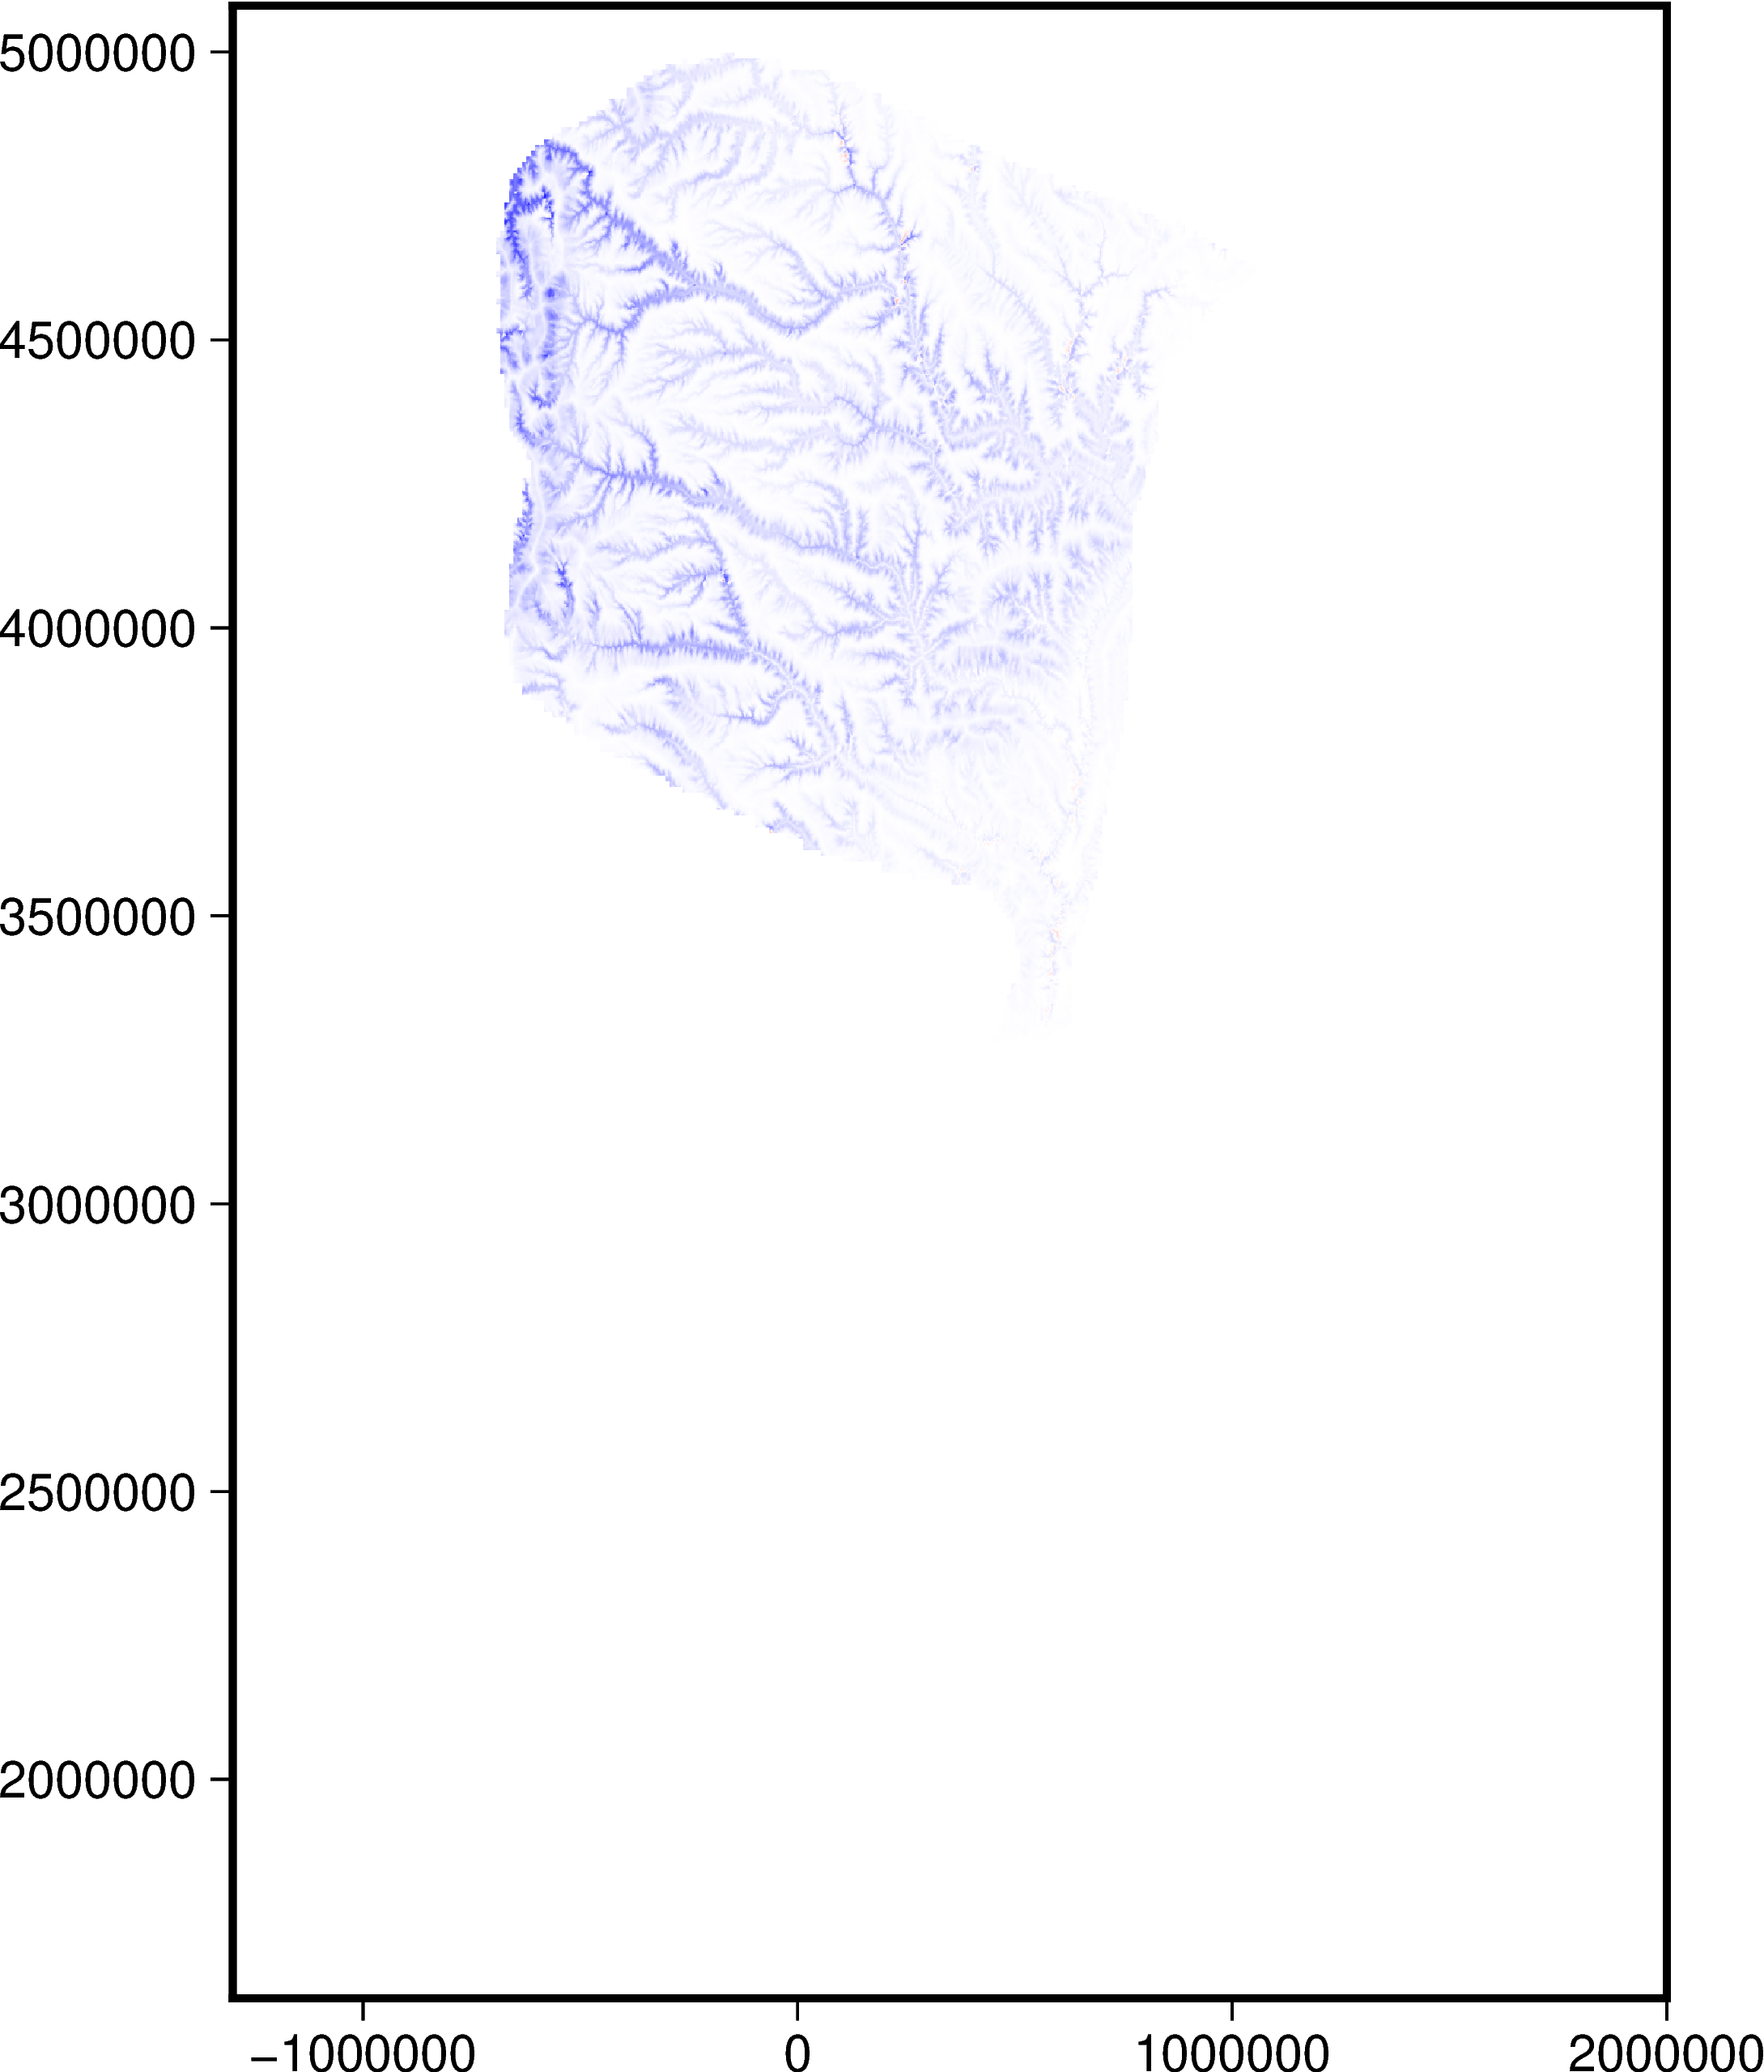

In [71]:

# Merge the datasets along their common coordinates
resultsElev = xr.merge([resultMC, resultAP, resultGR])   
# Initialize a figure for plotting
fig = pygmt.Figure()

# Define the region and projection
# region=[-1.25e6,3.0e6,3.0e6,5.05e6]
region = [merged_dataset1.x.min().values, merged_dataset1.x.max().values, merged_dataset1.y.min().values, merged_dataset1.y.max().values]

projection = "X9c/12.5c"

# Create colormaps for each dataset
pygmt.makecpt(cmap="polar", reverse = False, series=[-600, 600], output="diff_erodep")
pygmt.makecpt(cmap="geo", series=[-6000, 6000], output="geo")

# Plot the basemap
fig.basemap(region=region, projection=projection, frame=['a'])

# Plot the grid images with their respective colormaps
# fig.grdimage(grid=merged_dataset1.elevation, shading=True, cmap="geo", transparency = 40)
fig.grdimage(grid=resulPMiss.erodep, shading=False, cmap="diff_erodep", nan_transparent=True)


# Add a colorbar
# fig.colorbar(frame=["a100", "x+lEroDep Difference (m/Myr)", "y+lm/Myr"], position="jBC+o0c/-2.5c+w10c/0.3c+h")
# Save the figure
# fig.savefig(f"Mississippi_EroDep_difference_{model1}_minus_{model2}.png", dpi=500)
# fig.savefig(f"Tennessee_Erodep.png", dpi=500)

# Display the figure
fig.show(dpi=500, width=500)

In [142]:
# Define the output directory where merged files will be saved

model1 = 'M1-CMax-THigh_K5'
model2 = 'M1-CMax-TMid_K5'
model3 = 'M1-CMax-TLow_K5'

model4 = 'M1-CMid-THigh_K5'
model5 = 'M1-CMid-TMid_K5'
model6 = 'M1-CMid-TLow_K5'

model7 = 'M1-CMin-THigh_K5'
model8 = 'M1-CMin-TMid_K5'
model9 = 'M1-CMin-TLow_K5'

models = [model1, model2, model3, model4, model5, model6, model7, model8, model9]

PMiss_Tot = []

AppSL = []
YaMa = []
MidConSL = []
SupWy = []
AmmaWich = []
Penok = []
TraH = []
MCVF = []
GrenV = []



step = 18

for model in models:

    out1 = '../3_rasters/4_fullTime/' + model
    merged_nc1 = os.path.join(out1, f"Merged_{step}.nc")
    merged_dataset1 = xr.open_dataset(merged_nc1, engine='netcdf4')

# for vol in PMiss_Tot: 
    PMiss01 = merged_dataset1.where(merged_dataset1.ProvenanceC == 2)
    PMiss1 = PMiss01.where(PMiss01.elevation >= 0)
    PMiss_Tot.append((PMiss1.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3))
    
    Appa01 = PMiss1.where(PMiss1.Provenance == 1)
    AppEr = Appa01.where(Appa01.erodep < 0)
    AppSL.append((AppEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3)) #(multiply by area, convert to km3,converto to Tons) 
    
    YaMa1 = PMiss1.where(PMiss1.Provenance == 4)
    YaMaEr = YaMa1.where(YaMa1.erodep < 0)
    YaMa.append((YaMaEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3))  
    
    MidCon1 = PMiss1.where(PMiss1.Provenance == 6)
    MidConEr = MidCon1.where(MidCon1.erodep < 0)
    MidConSL.append((MidConEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3))   

    SupWy1 = PMiss1.where(PMiss1.Provenance == 7)
    SupWyEr = SupWy1.where(SupWy1.erodep < 0)
    SupWy.append((SupWyEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3))

    AmmaWich1 = PMiss1.where(PMiss1.Provenance == 5)
    AmmaWichEr = AmmaWich1.where(AmmaWich1.erodep < 0)
    AmmaWich.append((AmmaWichEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3)) 

    Penok1 = PMiss1.where(PMiss1.Provenance == 8)
    PenokEr = Penok1.where(Penok1.erodep < 0)
    Penok.append((PenokEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3)) 

    TraH1 = PMiss1.where(PMiss1.Provenance == 9)
    TraHEr = TraH1.where(TraH1.erodep < 0)
    TraH.append((TraHEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3)) 

    MCVF1 = PMiss1.where(PMiss1.Provenance == 10)
    MCVFEr = MCVF1.where(MCVF1.erodep < 0)
    MCVF.append((MCVFEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3))

    GrenV1 = PMiss1.where(PMiss1.Provenance == 2)
    GrenVEr = GrenV1.where(GrenV1.erodep < 0)
    GrenV.append((GrenVEr.erodep.sum().values)*(-6250000 * 1.e-9* 1.e-3))  


# PMiss_Tot

In [143]:
PMiss_TotVals = [AppSL, YaMa, MidConSL, SupWy, AmmaWich, Penok, TraH, MCVF, GrenV]
PMiss_TotVals

[[7.164505528743078,
  7.001287019344888,
  6.985325566088602,
  4.414649183241179,
  4.286740926164579,
  4.273364036378972,
  2.5061076798235984,
  2.469680774905828,
  2.455519772521885],
 [87.89705869335592,
  87.13864167996466,
  86.47079153568386,
  55.48365690379278,
  55.03784904467542,
  54.72911753426317,
  29.793828041583115,
  29.553787768477243,
  29.473002237334594],
 [41.34205371002998,
  40.79808735025352,
  40.09820852989504,
  24.60973950732652,
  24.29678763326621,
  23.942438062475603,
  14.730015509486888,
  14.525572980356046,
  14.34397011538836],
 [20.235283647617493,
  19.97183309309167,
  19.832896730275536,
  12.71339637010127,
  12.534015612510244,
  12.516787674326766,
  6.414461679837213,
  6.3476375387675095,
  6.333884060811567],
 [6.193231056677999,
  6.068637245507968,
  5.933819348065854,
  3.8814090985337013,
  3.8160983563076796,
  3.74327881825459,
  2.1123733571733245,
  2.0818048478787192,
  2.046638422449502],
 [1.9719989403559237,
  2.021704989

In [144]:
data_array = xr.DataArray(PMiss_TotVals, dims=['sources', 'models'])
# Create a DataFrame
df = pd.DataFrame(data_array, columns=[f'Model_{i+1}' for i in range(data_array.shape[1])], index=[f'Source_{i+1}' for i in range(data_array.shape[0])])

# Print the DataFrame
print(df)

            Model_1    Model_2    Model_3    Model_4    Model_5    Model_6  \
Source_1   7.164506   7.001287   6.985326   4.414649   4.286741   4.273364   
Source_2  87.897059  87.138642  86.470792  55.483657  55.037849  54.729118   
Source_3  41.342054  40.798087  40.098209  24.609740  24.296788  23.942438   
Source_4  20.235284  19.971833  19.832897  12.713396  12.534016  12.516788   
Source_5   6.193231   6.068637   5.933819   3.881409   3.816098   3.743279   
Source_6   1.971999   2.021705   2.034687   1.327078   1.340413   1.353505   
Source_7   2.417400   2.415904   2.418345   1.679445   1.682213   1.681609   
Source_8   2.901124   2.844704   2.809053   1.763401   1.729584   1.693422   
Source_9   1.426864   1.391258   1.348306   0.841378   0.820457   0.796491   

            Model_7    Model_8    Model_9  
Source_1   2.506108   2.469681   2.455520  
Source_2  29.793828  29.553788  29.473002  
Source_3  14.730016  14.525573  14.343970  
Source_4   6.414462   6.347638   6.333884  

In [145]:
# Function to create a list of tables (3x3) for each source
def create_tables(df):
    tables = []
    for i in range(df.shape[0]):
        table = df.iloc[i].values.reshape(3, 3).T
        tables.append(table)
    return tables

# Create the tables
tables = create_tables(df)

# Create a DataFrame for each table and store them in a list
dfs = []
for idx, table in enumerate(tables):
    df_table = pd.DataFrame(table,
                            columns=['High_Climate', 'Mid_Climate', 'Low_Climate'],
                            index=['High_Tectonic', 'Mid_Tectonic','Low_Tectonic' ])
    df_table.index.name = f'Source_{idx+1}'
    dfs.append(df_table)

# Print the DataFrames
for idx, df_table in enumerate(dfs):
    print(f"DataFrame {idx+1}:\n{df_table}\n")
PMiss_TotVals = [AppSL, YaMa, MidConSL, SupWy, AmmaWich, Penok, TraH, MCVF, GrenV]


DataFrame 1:
               High_Climate  Mid_Climate  Low_Climate
Source_1                                             
High_Tectonic      7.164506     4.414649     2.506108
Mid_Tectonic       7.001287     4.286741     2.469681
Low_Tectonic       6.985326     4.273364     2.455520

DataFrame 2:
               High_Climate  Mid_Climate  Low_Climate
Source_2                                             
High_Tectonic     87.897059    55.483657    29.793828
Mid_Tectonic      87.138642    55.037849    29.553788
Low_Tectonic      86.470792    54.729118    29.473002

DataFrame 3:
               High_Climate  Mid_Climate  Low_Climate
Source_3                                             
High_Tectonic     41.342054    24.609740    14.730016
Mid_Tectonic      40.798087    24.296788    14.525573
Low_Tectonic      40.098209    23.942438    14.343970

DataFrame 4:
               High_Climate  Mid_Climate  Low_Climate
Source_4                                             
High_Tectonic     20.235284

In [146]:
# Calculate the average of each DataFrame
averages = []
for df_table in dfs:
    avg_values = df_table.values.mean()
    averages.append(avg_values)



# Print the averages
for idx, avg in enumerate(averages):
    print(f"Average of DataFrame {idx+1}: {avg}")

Average of DataFrame 1: 4.617464498579178
Average of DataFrame 2: 57.28641482657008
Average of DataFrame 3: 26.52076371094202
Average of DataFrame 4: 12.988910711926588
Average of DataFrame 5: 3.9863656167610375
Average of DataFrame 6: 1.4103947760580704
Average of DataFrame 7: 1.681338547266697
Average of DataFrame 8: 1.7815180570400873
Average of DataFrame 9: 0.8461743233492


In [133]:
avgval

[High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64,
 High_Climate    2.851627
 Mid_Climate     1.728802
 Low_Climate     0.764125
 dtype: float64]